In [54]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

****

**Description:**
The Haberman dataset is a classic dataset in the field of survival analysis and is often used for binary classification problems in machine learning. This dataset contains information about patients who have undergone breast cancer surgery, with the goal of predicting patient survival based on certain attributes.

**Attribute Information:**
*   Age of patient at time of operation (numerical)
*   Patient's year of operation (year - 1900, numerical)
*   Number of positive axillary nodes detected (numerical)
*   Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 years




**Objective:**
To predict whether the patient will survive after 5 years or not based upon the patient's age, year of treatment and the number of positive lymph nodes

In [55]:
#loading the dataset
haberman=pd.read_csv("haberman.csv",names=["Age","Year_of_operation","positive_lymph_node","survival_status_after_5years"])

### **Understanding the data:**

In [56]:
#first five rows of the dataset
haberman.head(5)

,Age,Year_of_operation,positive_lymph_node,survival_status_after_5years
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [57]:
#last five rows of the dataset
haberman.tail(5)


,Age,Year_of_operation,positive_lymph_node,survival_status_after_5years
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [58]:
#random 5 rows of the dataset
haberman.sample(5)

,Age,Year_of_operation,positive_lymph_node,survival_status_after_5years
107,48,58,11,2
195,56,67,0,1
122,49,61,0,1
149,52,60,4,1
102,47,67,0,1


In [59]:
#shape of the dataset
print("this dataset conatins: "+str(haberman.shape[0])+" rows")
print('this dataset contains: '+str(haberman.shape[1])+" columns")

this dataset conatins: 306 rows
this dataset contains: 4 columns


In [60]:
#info of the dataset
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Age                           306 non-null    int64
 1   Year_of_operation             306 non-null    int64
 2   positive_lymph_node           306 non-null    int64
 3   survival_status_after_5years  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [61]:
# statistics of the dataset
haberman.describe()

,Age,Year_of_operation,positive_lymph_node,survival_status_after_5years
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


**Conclusions:**


1.   the dataset contains 306 rows and 4 columns
2.   there is no null values in the dataset
3.   survival_status_after_5years has the data type of int64.It has to be converted to categorical datatype.
4.   survival_status_after_5years has no meaning so it has to be converted into 0(died before 5 years) or 1(survived after 5 years)
5.   Age of the patients distributed between 30-83 with mean age of 52 years
6.   there are maximum 52 positive lymph nodes present in patients
7.   approximately 25% of the patients has no positive lymph nodes and approximately 75% of patients has only 4 positive lymph node
8. approximately 25% of the patients has more than 4 positive lymph nodes

In [62]:
# changing the data types
haberman["survival_status_after_5years"]=haberman["survival_status_after_5years"].astype("category")
#mapping to 0 or 1
haberman["survival_status_after_5years"]=haberman["survival_status_after_5years"].map({1:1,2:0})
haberman["survival_status_after_5years"]

,survival_status_after_5years
0,1
1,1
2,1
3,1
4,1
...,...
301,1
302,1
303,1
304,0


### **Univariate analysis:**

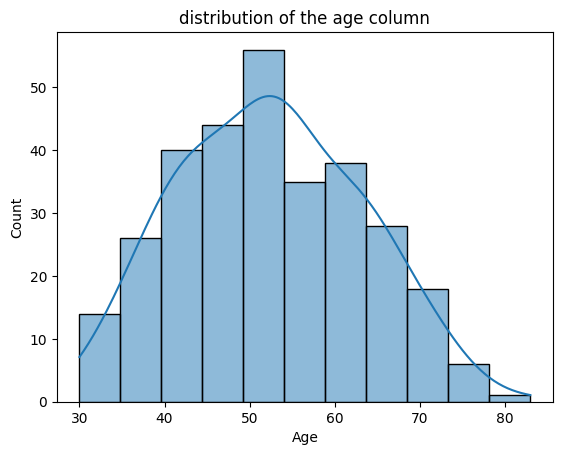

In [63]:
#distribution of the Age
sns.histplot(haberman["Age"],kde=True)
plt.title("distribution of the age column")
plt.show()

<Axes: ylabel='Age'>

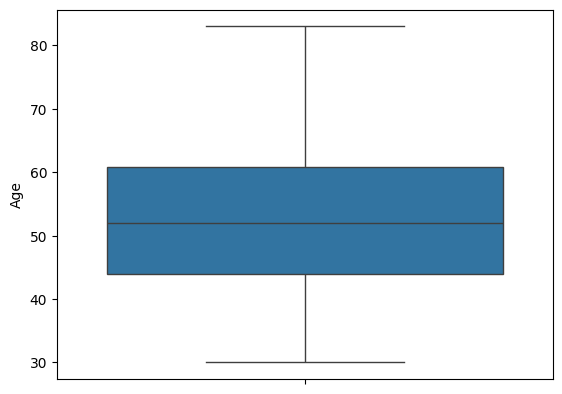

In [64]:
sns.boxplot(haberman["Age"])

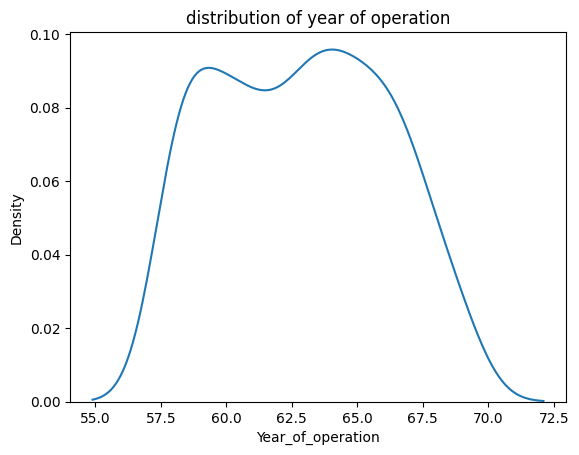

In [65]:
#distribution of year of operation
sns.kdeplot(haberman["Year_of_operation"])
plt.title('distribution of year of operation')
plt.show()

<Axes: ylabel='Year_of_operation'>

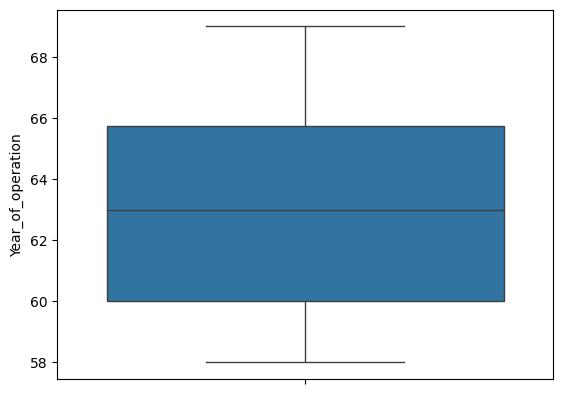

In [66]:
sns.boxplot(haberman["Year_of_operation"])

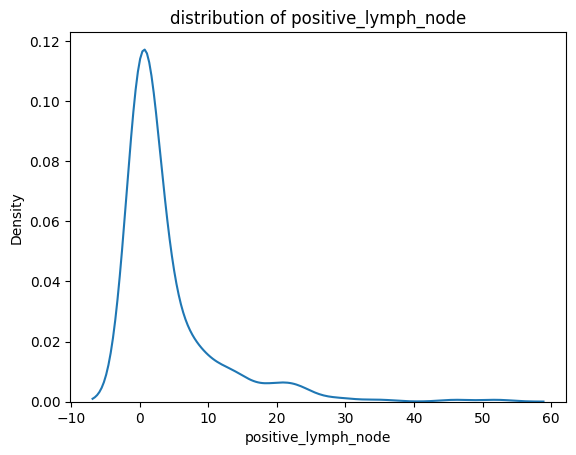

In [67]:
#distribution of positive_lymph_node
sns.kdeplot(haberman["positive_lymph_node"])
plt.title('distribution of positive_lymph_node')
plt.show()

<Axes: ylabel='positive_lymph_node'>

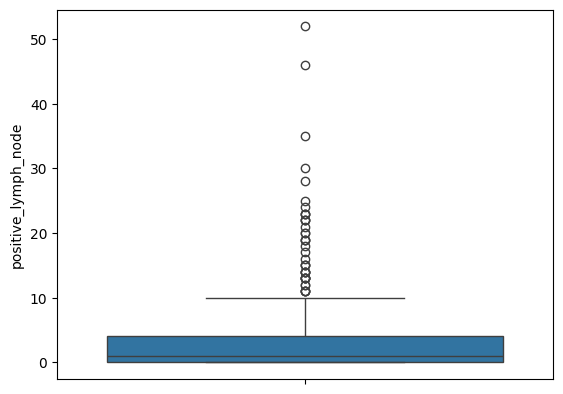

In [68]:
sns.boxplot(haberman["positive_lymph_node"])

**Removing outliers in positive_lymph_node column**

In [69]:
q1=haberman["positive_lymph_node"].quantile(0.25)
q3=haberman["positive_lymph_node"].quantile(0.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
haberman=haberman[(haberman["positive_lymph_node"]>=lower_limit) & (haberman["positive_lymph_node"]<=upper_limit)]
haberman.reset_index()

,index,Age,Year_of_operation,positive_lymph_node,survival_status_after_5years
0,0,30,64,1,1
1,1,30,62,3,1
2,2,30,65,0,1
3,3,31,59,2,1
4,4,31,65,4,1
...,...,...,...,...,...
261,301,75,62,1,1
262,302,76,67,0,1
263,303,77,65,3,1
264,304,78,65,1,0


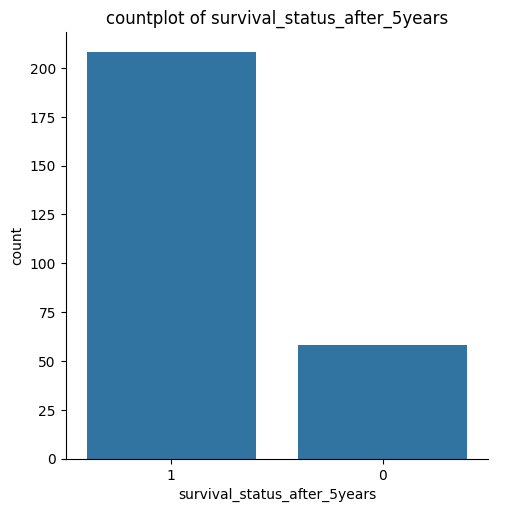

In [70]:
# countplot of survival_status_after_5years
sns.catplot(data=haberman,x=haberman["survival_status_after_5years"],kind="count")
plt.title("countplot of survival_status_after_5years")
plt.show()

([<matplotlib.patches.Wedge at 0x7c8c3d758cd0>,
 [Text(-0.8518547349918524, 0.6959479222412845, '1'),
  Text(0.8518547349918523, -0.6959479222412847, '0')],
 [Text(-0.4646480372682831, 0.3796079575861552, '78.20%'),
  Text(0.464648037268283, -0.37960795758615523, '21.80%')])

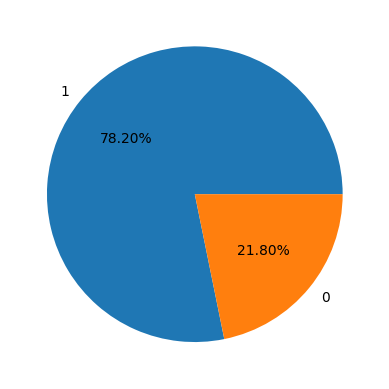

In [71]:
#pie plot of survival_status_after_5years
plt.pie(haberman["survival_status_after_5years"].value_counts(),labels=haberman["survival_status_after_5years"].value_counts().index,autopct="%.2f%%")

**Observations:**

*   Age of the patients and year of operation approximately follows the normal distribution
*   positive_lymph_node column follows the pareto distribution i.e 80% of patients has less no.of positive lymph nodes and 20% of patients has more no.of positive lymph nodes.
*   most of the patients are survived(72.53%) after taking the breast cancer surgery
*   there are som outliers present in the positive_lymph_node column

### **Bivariate Analysis:**

#### **Age vs survival_status_after_5years:**

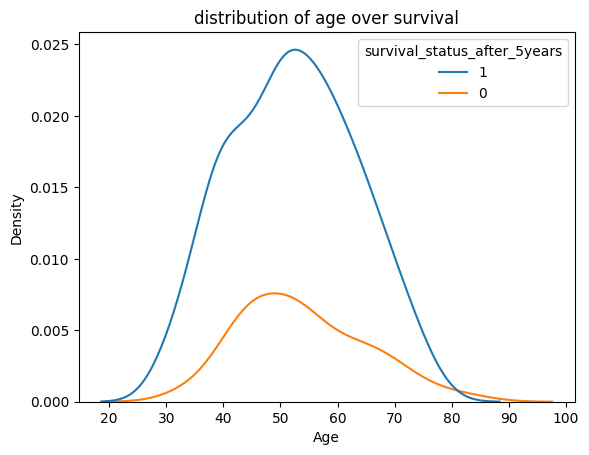

In [72]:
sns.kdeplot(data=haberman,x="Age",hue="survival_status_after_5years")
plt.title("distribution of age over survival")
plt.show()

#### **year of operation vs survival_status_after_5years**

Text(0.5, 1.0, 'distribution of year of operation over survival')

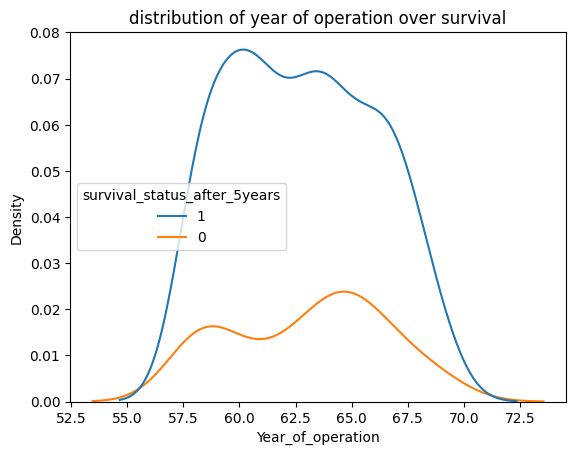

In [73]:
sns.kdeplot(data=haberman,x="Year_of_operation",hue="survival_status_after_5years")
plt.title("distribution of year of operation over survival")

#### **positive_lymph_nodes vs survival_status_after_5years**

Text(0.5, 1.0, 'distribution of positive lymph nodes over survival')

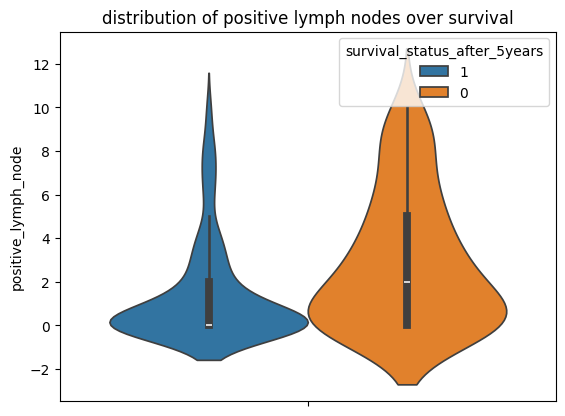

In [74]:
sns.violinplot(data=haberman,y="positive_lymph_node",hue="survival_status_after_5years")
plt.title("distribution of positive lymph nodes over survival")

**Conclusions:**

1.   irrespective of the age the survival rate is higher than dying
2.   patients having age between 50-60 years have high probability to survive after undergoing breast cancer surgery
3.   patients treated before 1956 has high probability to die before 5 years after undergoing  breast cancer surgery
4.   patients with 0-7 positive lymph nodes generally have a higher probability of survival than those with one or more positive lymph nodes



,Age,Year_of_operation,positive_lymph_node,survival_status_after_5years
Age,1.000000,0.088910,-0.105260,-0.063278
Year_of_operation,0.088910,1.000000,-0.007291,-0.030597
positive_lymph_node,-0.105260,-0.007291,1.000000,-0.236807
survival_status_after_5years,-0.063278,-0.030597,-0.236807,1.000000


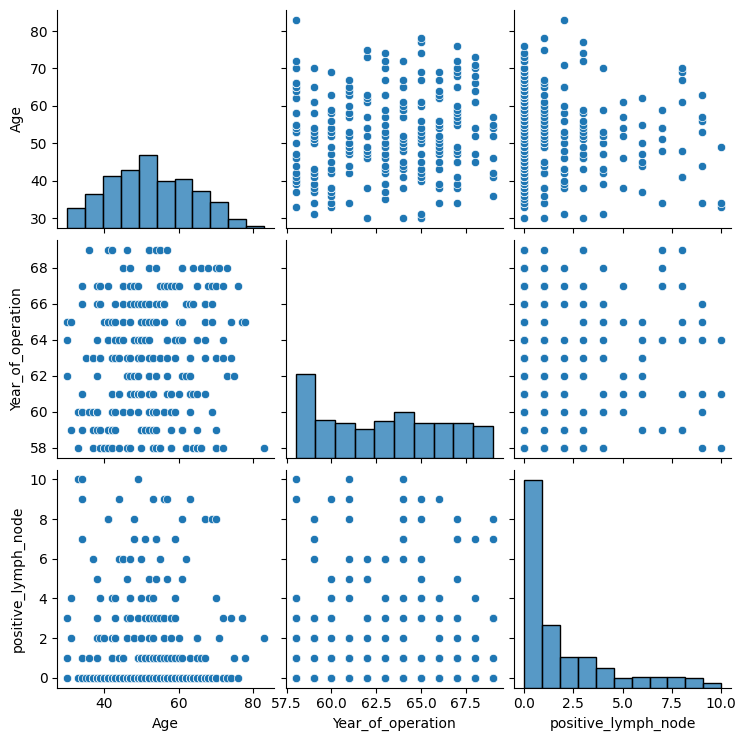

In [75]:
sns.pairplot(haberman)
haberman.corr()